#### Api de equipos

In [15]:
import requests
import json

url = "http://api.sofascore.com/api/v1/team/2817"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Extraer el JSON de la respuesta
    data = response.json()
    # Imprimir el JSON de manera bonita
    pretty_json = json.dumps(data, indent=4)
    print(pretty_json)
else:
    print("Error en la solicitud:", response.status_code)


{
    "team": {
        "name": "Barcelona",
        "slug": "barcelona",
        "shortName": "Barcelona",
        "gender": "M",
        "sport": {
            "name": "Football",
            "slug": "football",
            "id": 1
        },
        "category": {
            "name": "Spain",
            "slug": "spain",
            "sport": {
                "name": "Football",
                "slug": "football",
                "id": 1
            },
            "id": 32,
            "country": {
                "alpha2": "ES",
                "alpha3": "ESP",
                "name": "Spain"
            },
            "flag": "spain",
            "alpha2": "ES"
        },
        "tournament": {
            "name": "LaLiga",
            "slug": "laliga",
            "category": {
                "name": "Spain",
                "slug": "spain",
                "sport": {
                    "name": "Football",
                    "slug": "football",
                    "id": 1
    

### Lista de equipos de primera

In [16]:
import requests
import csv
import time

def fetch_team_data(team_id):
    """ Realiza una solicitud al API para obtener datos de un equipo específico. """
    url = f"http://api.sofascore.com/api/v1/team/{team_id}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        team = data.get('team', {})
        if team:
            # Extraer la información del género del equipo
            gender = team.get('gender', 'Unknown')  # Por defecto 'Unknown' si no está especificado
            primary_tournament = team.get('primaryUniqueTournament', {}).get('name', 'No Tournament')
            sport = team.get('sport', {}).get('name', 'No Sport')
            return {
                'id': team_id,
                'name': team.get('name', 'No Name'),
                'country': team.get('category', {}).get('country', {}).get('name', 'No Country'),
                'sport': sport,
                'primary_tournament': primary_tournament,
                'gender': gender  # Añadir el género
            }
    return None

#Fuerza bruta
# Preparar el archivo CSV y el escritor de CSV
# with open('teams.csv', 'w', newline='') as file:
#     fieldnames = ['id', 'name', 'country', 'sport', 'primary_tournament', 'gender']  # Añadir 'gender' a los nombres de los campos
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()

#     # Realizar las solicitudes y escribir cada equipo directamente en el CSV
#     for team_id in range(3500):  # Desde 0 a 3500
#         team_data = fetch_team_data(team_id)
#         if team_data:
#             writer.writerow(team_data)
#         time.sleep(0.01)  # Pausa de 0.01 segundos para evitar limitaciones de tasa

#         print(f"Processed team ID: {team_id}")  # Imprimir el ID del equipo procesado para seguimiento

# Equipos de primera
team_ids = [
    2817, 2829, 2885, 6577, 33779, 24264, 2836, 2825,
    2824, 2816, 2819, 2828, 2859, 2833, 2820, 2826, 2821,
    2818, 4488, 2858
]

with open('../data/teams.csv', 'w', newline='') as file:
    fieldnames = ['id', 'name', 'country', 'sport', 'primary_tournament', 'gender']  # Añadir 'gender' a los nombres de los campos
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    # Realizar las solicitudes y escribir cada equipo directamente en el CSV
    for team_id in team_ids:  # Desde 0 a 3500
        team_data = fetch_team_data(team_id)
        if team_data:
            writer.writerow(team_data)
        time.sleep(0.01)  # Pausa de 0.01 segundos para evitar limitaciones de tasa

        print(f"Processed team ID: {team_id}")  # Imprimir el ID del equipo procesado para seguimiento


Processed team ID: 2817
Processed team ID: 2829
Processed team ID: 2885
Processed team ID: 6577
Processed team ID: 33779
Processed team ID: 24264
Processed team ID: 2836
Processed team ID: 2825
Processed team ID: 2824
Processed team ID: 2816
Processed team ID: 2819
Processed team ID: 2828
Processed team ID: 2859
Processed team ID: 2833
Processed team ID: 2820
Processed team ID: 2826
Processed team ID: 2821
Processed team ID: 2818
Processed team ID: 4488
Processed team ID: 2858


In [17]:
import pandas as pd

# Configurar la visualización para que muestre todas las columnas
pd.set_option('display.max_columns', None)
# Configurar para que no limite la cantidad de filas mostradas
pd.set_option('display.max_rows', None)
# Configurar la anchura máxima de cada columna
pd.set_option('display.max_colwidth', None)

# Cargar los datos del archivo CSV
df = pd.read_csv('../data/teams.csv')

# Filtrar para obtener solo los equipos de España que juegan en LaLiga
spanish_laliga_teams = df[(df['country'] == 'Spain') & (df['primary_tournament'] == 'LaLiga')]

# Mostrar los equipos españoles de LaLiga como una tabla
print(spanish_laliga_teams.to_string(index=False))


  id        name       country  sport   primary_tournament gender
 2817        Barcelona  Spain  Football       LaLiga         M   
 2829      Real Madrid  Spain  Football       LaLiga         M   
 2885 Deportivo Alavés  Spain  Football       LaLiga         M   
 6577       Las Palmas  Spain  Football       LaLiga         M   
33779          Granada  Spain  Football       LaLiga         M   
24264        Girona FC  Spain  Football       LaLiga         M   
 2836  Atlético Madrid  Spain  Football       LaLiga         M   
 2825    Athletic Club  Spain  Football       LaLiga         M   
 2824    Real Sociedad  Spain  Football       LaLiga         M   
 2816       Real Betis  Spain  Football       LaLiga         M   
 2819       Villarreal  Spain  Football       LaLiga         M   
 2828         Valencia  Spain  Football       LaLiga         M   
 2859           Getafe  Spain  Football       LaLiga         M   
 2833          Sevilla  Spain  Football       LaLiga         M   
 2820     

#### Clasificación

In [18]:
import requests
import pandas as pd

def fetch_and_display_standings(url):
    """Esta función obtiene los datos de la clasificación desde el URL dado y los muestra en forma de tabla."""
    
    # Realizar la solicitud GET a la API
    response = requests.get(url)
    data = response.json()

    # Extraer los datos de los equipos de la clasificación
    teams_data = data['standings'][0]['rows']  # Asumiendo que 'standings' contiene la clasificación deseada

    # Crear una lista para almacenar los datos de los equipos
    teams_list = []
    for team in teams_data:
        team_info = {
            'Position': team['position'],
            'Team': team['team']['name'],
            'Matches': team['matches'],
            'Wins': team['wins'],
            'Draws': team['draws'],
            'Losses': team['losses'],
            'Goals For': team['scoresFor'],
            'Goals Against': team['scoresAgainst'],
            'Points': team['points'],
            'Promotion/Relegation': team.get('promotion', {}).get('text', 'N/A')  # Manera segura de manejar promociones no disponibles
        }
        teams_list.append(team_info)

    # Convertir la lista en un DataFrame de pandas para una mejor visualización
    df = pd.DataFrame(teams_list)

    # Configurar pandas para mostrar la tabla completa sin truncar
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')

    print(df)

# URL para la clasificación total de LaLiga
url_total = "http://www.sofascore.com/api/v1/unique-tournament/8/season/52376/standings/total"
# URL para la clasificación de local
url_home = "http://www.sofascore.com/api/v1/unique-tournament/8/season/52376/standings/home"
# URL para la clasificación de visitante
url_away = "http://www.sofascore.com/api/v1/unique-tournament/8/season/52376/standings/away"

# Llamar a la función para cada clasificación
print("Clasificación Total de LaLiga:")
fetch_and_display_standings(url_total)

print("\nClasificación en Casa de LaLiga:")
fetch_and_display_standings(url_home)

print("\nClasificación como Visitante de LaLiga:")
fetch_and_display_standings(url_away)


Clasificación Total de LaLiga:
    Position        Team        Matches  Wins  Draws  Losses  Goals For  Goals Against  Points          Promotion/Relegation        
0       1          Real Madrid    36      29     6       1       83           22          93                        Champions League
1       2            Barcelona    36      24     7       5       74           43          79                        Champions League
2       3            Girona FC    36      23     6       7       75           45          75                        Champions League
3       4      Atlético Madrid    36      23     4       9       67           39          73                        Champions League
4       5        Athletic Club    36      17    11       8       58           37          62                      UEFA Europa League
5       6        Real Sociedad    36      15    12       9       49           37          57                      UEFA Europa League
6       7           Real Betis    36  

#### Mejores jugadores por categorías

EXtrae mal el dato relevante de cada categoría

In [19]:
import requests
import pandas as pd

def fetch_and_display_top_players(url, category):
    response = requests.get(url)
    data = response.json()
    # print(data)

    # Verificar si la categoría específica existe en los datos
    if category in data['topPlayers']:
        players_data = data['topPlayers'][category]

        players_list = []
        for player in players_data:
            # Extraer la información relevante del jugador y su equipo
            player_details = {
                'Name': player['player']['name'],
                'Position': player['player']['position'],
                'Team': player['team']['name'],
                category: player['statistics'].get(category, 'N/A'),
                'Appearances': player['statistics'].get('appearances', 'N/A')
            }
            players_list.append(player_details)

        # Crear DataFrame a partir de la lista de jugadores
        df = pd.DataFrame(players_list)
        return df
    else:
        print(f"No data available for category: {category}")
        return pd.DataFrame()  # Retorna un DataFrame vacío si no hay datos para esa categoría

# URL base que contiene las estadísticas generales de los jugadores
url_base = "http://www.sofascore.com/api/v1/unique-tournament/8/season/52376/top-players/overall"

# Lista de categorías de estadísticas para procesar
categories = [
    'rating', 'goals', 'expectedGoals', 'assists', 'expectedAssists', 'goalsAssistsSum',
    'penaltyGoals', 'freeKickGoal', 'scoringFrequency', 'totalShots', 'shotsOnTarget',
    'bigChancesMissed', 'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateLongBalls',
    'successfulDribbles', 'penaltyWon', 'tackles', 'interceptions', 'clearances', 'possessionLost',
    'yellowCards', 'redCards', 'saves', 'goalsPrevented', 'mostConceded', 'leastConceded', 'cleanSheet'
]

# categories = [
#     'goals'
# ]

# Mostrar la información de cada categoría
for category in categories:
    print(f"\n--- {category.upper()} ---")
    df_category = fetch_and_display_top_players(url_base, category)
    if not df_category.empty:
        print(df_category)



--- RATING ---
            Name          Position       Team         rating   Appearances
0         Jude Bellingham     M         Real Madrid  8.074074      27     
1              Toni Kroos     M         Real Madrid  7.618750      32     
2              Iago Aspas     F          Celta Vigo  7.530303      33     
3                    Isco     M          Real Betis  7.520690      29     
4       Antoine Griezmann     F     Atlético Madrid  7.480645      31     
5          İlkay Gündoğan     M           Barcelona  7.473529      34     
6            Aleix García     M           Girona FC  7.465714      35     
7           Takefusa Kubo     M       Real Sociedad  7.410714      29     
8       Federico Valverde     M         Real Madrid  7.402857      35     
9          Iñaki Williams     M       Athletic Club  7.351515      33     
10           Sergio Ramos     D             Sevilla  7.346154      26     
11           Lamine Yamal     F           Barcelona  7.325714      35     
12       

#### Mejores jugadores por partido

In [20]:
import requests
import pandas as pd

def fetch_and_process_data(url, category):
    response = requests.get(url)
    data = response.json()

    # Procesar la categoría específica de topPlayers
    if category in data['topPlayers']:
        players_data = data['topPlayers'][category]
        players_list = []
        for player in players_data:
            player_details = {
                'Name': player['player']['name'],
                'Position': player['player']['position'],
                'Team': player['event']['homeTeam']['name'] + " vs. " + player['event']['awayTeam']['name'],
                'Match Score': f"{player.get('event', {}).get('homeScore', {}).get('display', 'N/A')}-{player.get('event', {}).get('awayScore', {}).get('display', 'N/A')}",
                'Statistic Value': player['statistic']
            }
            players_list.append(player_details)

        df = pd.DataFrame(players_list)
        return df
    else:
        return pd.DataFrame()  # Devuelve un DataFrame vacío si la categoría no existe
    
    
url = "http://www.sofascore.com/api/v1/unique-tournament/8/season/52376/top-players-per-game/all/overall"

# Lista de categorías para procesar
categories = [
    'rating', 'goals', 'goalAssist', 'expectedAssists', 'expectedGoals',
    'errorLeadToAGoal', 'bigChanceMissed', 'bigChanceCreated', 'keyPass',
    'accuratePass', 'totalPass', 'wonContest', 'totalTackle', 'totalClearance',
    'saves', 'goalsPrevented', 'penaltySave', 'penaltyMiss'
]

# Procesar y mostrar cada categoría
for category in categories:
    print(f"--- {category.upper()} ---")
    df_category = fetch_and_process_data(url, category)
    if not df_category.empty:
        print(df_category)
    else:
        print("No data available for this category.")
    print("\n")



--- RATING ---
          Name        Position                Team               Match Score  Statistic Value
0          Iago Aspas     F            Celta Vigo vs. Las Palmas      4-1          10.0      
1  Luis Javier Suárez     F                  Almería vs. Granada      3-3          10.0      
2             Rodrygo     F             Real Madrid vs. Valencia      5-1          10.0      
3     Jude Bellingham     M     Real Madrid vs. Deportivo Alavés      5-0          10.0      
4    Thibaut Courtois     G     Real Madrid vs. Deportivo Alavés      5-0           9.8      
5       Gerard Moreno     F         Villarreal vs. Athletic Club      2-3           9.8      
6      Luís Maximiano     G           Rayo Vallecano vs. Almería      0-1           9.8      
7       Ferran Torres     F             Real Betis vs. Barcelona      2-4           9.8      
8         Luka Modrić     M           Real Madrid vs. Celta Vigo      4-0           9.7      
9               Portu     F              Giro

#### Datos de un jugador

In [21]:
import requests
import pandas as pd

def fetch_player_seasons(url):
    response = requests.get(url)
    data = response.json()
    
    # Preparar una lista para recopilar la información procesada
    seasons_list = []
    for tournament_season in data['uniqueTournamentSeasons']:
        tournament_info = tournament_season['uniqueTournament']
        tournament_name = tournament_info['name']
        for season in tournament_season['seasons']:
            season_details = {
                'Tournament': tournament_name,
                'Season Name': season['name'],
                'Year': season['year'],
                'Season ID': season['id']
            }
            seasons_list.append(season_details)

    # Convertir la lista en un DataFrame para facilitar la visualización
    df = pd.DataFrame(seasons_list)
    return df

# URL de la API para obtener estadísticas de temporada de un jugador específico
url = "http://www.sofascore.com/api/v1/player/991011/statistics/seasons"

# Obtener y mostrar los datos procesados
player_seasons_df = fetch_player_seasons(url)
print(player_seasons_df)


                 Tournament                             Season Name                    Year     Season ID
0                                 LaLiga                               LaLiga 23/24      23/24    52376  
1                    Supercopa de España                   Supercopa de España 2024       2024    56121  
2   European Championship, Qualification  European Championship 2024, Qualification       2024    46599  
3                  UEFA Champions League                UEFA Champions League 23/24      23/24    52162  
4                  UEFA Champions League                UEFA Champions League 22/23      22/23    41897  
5                  UEFA Champions League                UEFA Champions League 21/22      21/22    36886  
6                  UEFA Champions League                UEFA Champions League 20/21      20/21    29267  
7                             Bundesliga                           Bundesliga 22/23      22/23    42268  
8                             Bundesliga      

In [22]:
import requests
import pandas as pd

def fetch_player_statistics(url):
    response = requests.get(url)
    data = response.json()

    # Extraer las estadísticas del jugador
    stats = data['statistics']
    
    # Crear un diccionario para recopilar la información procesada
    player_stats = {
        'Team': data['team']['name'],
        'Rating': stats['rating'],
        'Total Rating': stats['totalRating'],
        'Goals': stats['goals'],
        'Assists': stats['assists'],
        'Expected Goals': stats['expectedGoals'],
        'Expected Assists': stats['expectedAssists'],
        'Accurate Passes': stats['accuratePasses'],
        'Inaccurate Passes': stats['inaccuratePasses'],
        'Total Passes': stats['totalPasses'],
        'Successful Dribbles': stats['successfulDribbles'],
        'Yellow Cards': stats['yellowCards'],
        'Red Cards': stats['redCards'],
        'Shots On Target': stats['shotsOnTarget'],
        'Total Shots': stats['totalShots'],
        'Minutes Played': stats['minutesPlayed'],
        'Appearances': stats['appearances']
    }

    # Crear DataFrame para una visualización más clara
    df = pd.DataFrame([player_stats])
    return df

# URL de la API para obtener estadísticas detalladas de un jugador en una temporada y torneo específicos
url = "http://www.sofascore.com/api/v1/player/991011/unique-tournament/8/season/52376/statistics/overall"

# Obtener y mostrar los datos procesados
player_stats_df = fetch_player_statistics(url)
print(player_stats_df)


      Team       Rating   Total Rating  Goals  Assists  Expected Goals  Expected Assists  Accurate Passes  Inaccurate Passes  Total Passes  Successful Dribbles  Yellow Cards  Red Cards  Shots On Target  Total Shots  Minutes Played  Appearances
0  Real Madrid  8.074074       218       19       6         11.0173         4.257045           1285               150             1435              48                 5           1            34             61            2234           27     


In [23]:
import requests
import pandas as pd

def fetch_last_ratings(url):
    response = requests.get(url)
    data = response.json()

    # Preparar una lista para recopilar la información procesada
    ratings_list = []
    for rating_entry in data['lastRatings']:
        event_info = rating_entry['event']
        home_team = event_info['homeTeam']['name']
        away_team = event_info['awayTeam']['name']
        home_score = event_info['homeScore']['display']
        away_score = event_info['awayScore']['display']
        
        # Crear un diccionario para cada entrada
        rating_details = {
            'Event ID': rating_entry['eventId'],
            'Tournament': event_info['tournament']['name'],
            'Home Team': home_team,
            'Away Team': away_team,
            'Home Score': home_score,
            'Away Score': away_score,
            'Match Date': pd.to_datetime(rating_entry['startTimestamp'], unit='s'),
            'Player Rating': rating_entry['rating'],
            'Is Home': rating_entry['isHome'],
            'Opponent': rating_entry['opponent']['name']
        }
        ratings_list.append(rating_details)

    # Convertir la lista en un DataFrame para facilitar la visualización
    df = pd.DataFrame(ratings_list)
    return df

# URL de la API para obtener las últimas calificaciones de un jugador en una temporada y torneo específicos
url = "http://www.sofascore.com/api/v1/player/103417/unique-tournament/8/season/52376/last-ratings"

# Obtener y mostrar los datos procesados
player_ratings_df = fetch_last_ratings(url)
print(player_ratings_df)


   Event ID Tournament  Home Team   Away Team   Home Score  Away Score      Match Date      Player Rating  Is Home   Opponent 
0  11368649   LaLiga    Las Palmas  Real Betis       2           2     2024-05-16 17:30:00       6.5        False   Las Palmas
1  11368629   LaLiga    Real Betis     Almería       3           2     2024-05-12 19:00:00       8.8         True      Almería
2  11368677   LaLiga    Real Betis     Sevilla       1           1     2024-04-28 19:00:00       7.7         True      Sevilla
3  11368671   LaLiga      Valencia  Real Betis       1           2     2024-04-20 16:30:00       7.3        False     Valencia
4  11368709   LaLiga    Real Betis  Celta Vigo       2           1     2024-04-12 19:00:00       7.7         True   Celta Vigo


#### Datos de equipo

In [24]:
import pandas as pd
import requests

# Suponiendo que el archivo 'teams.csv' esté en el mismo directorio que el script o ajustar la ruta según corresponda
df_teams = pd.read_csv('../data/teams.csv')

results = pd.DataFrame()

def fetch_team_statistics(team_id, team_name):
    url = f"https://www.sofascore.com/api/v1/team/{team_id}/unique-tournament/8/season/52376/statistics/overall"
    response = requests.get(url)
    data = response.json()
    if 'statistics' in data:
        stats = data['statistics']
        stats['Team Name'] = team_name  # Añade el nombre del equipo al diccionario
        return stats
    else:
        return None

# Procesando cada equipo y almacenando los resultados
for index, row in df_teams.iterrows():
    team_id = row['id']
    team_name = row['name']  # Asegúrate de que la columna se llama 'name' en tu DataFrame
    team_stats = fetch_team_statistics(team_id, team_name)
    if team_stats:
        # Convertir el diccionario de estadísticas en un DataFrame
        stats_df = pd.DataFrame([team_stats])
        stats_df['Team ID'] = team_id  # Añade el ID del equipo para referencia
        # Reordenar las columnas para que 'Team Name' y 'Team ID' sean las primeras
        columns_order = ['Team Name', 'Team ID'] + [col for col in stats_df.columns if col not in ['Team Name', 'Team ID']]
        stats_df = stats_df[columns_order]
        # Concatenar con el DataFrame de resultados
        results = pd.concat([results, stats_df], ignore_index=True)

# Opcional: Guardar los resultados en un archivo CSV
results.to_csv('../data/team_statistics.csv', index=False)
print(results)


       Team Name      Team ID  goalsScored  goalsConceded  ownGoals  assists  shots  penaltyGoals  penaltiesTaken  freeKickGoals  freeKickShots  goalsFromInsideTheBox  goalsFromOutsideTheBox  shotsFromInsideTheBox  shotsFromOutsideTheBox  headedGoals  leftFootGoals  rightFootGoals  bigChances  bigChancesCreated  bigChancesMissed  shotsOnTarget  shotsOffTarget  blockedScoringAttempt  successfulDribbles  dribbleAttempts  corners  hitWoodwork  fastBreaks  fastBreakGoals  fastBreakShots  averageBallPossession  totalPasses  accuratePasses  accuratePassesPercentage  totalOwnHalfPasses  accurateOwnHalfPasses  accurateOwnHalfPassesPercentage  totalOppositionHalfPasses  accurateOppositionHalfPasses  accurateOppositionHalfPassesPercentage  totalLongBalls  accurateLongBalls  accurateLongBallsPercentage  totalCrosses  accurateCrosses  accurateCrossesPercentage  cleanSheets  tackles  interceptions  saves  errorsLeadingToGoal  errorsLeadingToShot  penaltiesCommited  penaltyGoalsConceded  \
0        

In [25]:
teams = [
    ("http://www.sofascore.com/es/equipo/futbol/barcelona/2817#tab:squad", "Barcelona"),
    ("http://www.sofascore.com/es/equipo/futbol/real-madrid/2829#tab:squad", "Real Madrid"),
    ("http://www.sofascore.com/es/equipo/futbol/atletico-madrid/2836#tab:squad", "Atlético Madrid"),
    ("http://www.sofascore.com/es/equipo/futbol/sevilla/2833#tab:squad", "Sevilla FC"),
    ("http://www.sofascore.com/es/equipo/futbol/real-betis/2816#tab:squad", "Real Betis"),
    ("http://www.sofascore.com/es/equipo/futbol/villarreal/2819#tab:squad", "Villarreal CF"),
    ("http://www.sofascore.com/es/equipo/futbol/real-sociedad/2824#tab:squad", "Real Sociedad"),
    ("http://www.sofascore.com/es/equipo/futbol/athletic-club/2825#tab:squad", "Athletic Club"),
    ("http://www.sofascore.com/es/equipo/futbol/valencia/2828#tab:squad", "Valencia CF"),
    ("http://www.sofascore.com/es/equipo/futbol/celta-vigo/2821#tab:squad", "Celta de Vigo"),
    ("http://www.sofascore.com/es/equipo/futbol/getafe/2859#tab:squad", "Getafe CF"),
    ("http://www.sofascore.com/es/equipo/futbol/girona/24264#tab:squad", "Girona"),
    ("http://www.sofascore.com/es/equipo/futbol/osasuna/2820#tab:squad", "CA Osasuna"),
    ("http://www.sofascore.com/es/equipo/futbol/alaves/2885#tab:squad", "Deportivo Alavés"),
    ("http://www.sofascore.com/es/equipo/futbol/granada/33779#tab:squad", "Granada CF"),
    ("http://www.sofascore.com/es/equipo/futbol/las-palmas/6577#tab:squad", "Las Palmas"),
    ("http://www.sofascore.com/es/equipo/futbol/cadiz/4488#tab:squad", "Cádiz CF"),
    ("http://www.sofascore.com/es/equipo/futbol/mallorca/2826#tab:squad", "RCD Mallorca"),
    ("http://www.sofascore.com/es/equipo/futbol/rayo-vallecano/2818#tab:squad", "Rayo Vallecano"),
    ("http://www.sofascore.com/es/equipo/futbol/almeria/2858#tab:squad", "Almería")
]


import requests
from bs4 import BeautifulSoup
import pandas as pd

def fetch_players(url, team_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    players = []
    for link in soup.find_all('a', href=True):
        href = link['href']
        if '/es/jugador/' in href:
            parts = href.split('/')
            player_name = parts[-2]
            player_id = parts[-1]
            players.append({'Team': team_name, 'Name': player_name, 'ID': player_id})
    
    return pd.DataFrame(players)


results_df = pd.DataFrame()  # DataFrame vacío para almacenar todos los resultados

for url, team_name in teams:
    team_df = fetch_players(url, team_name)
    results_df = pd.concat([results_df, team_df], ignore_index=True)

# Guardar los resultados en un archivo CSV
results_df.to_csv('../data/players_info.csv', index=False)
print("Datos guardados en 'players_info.csv'.")


Datos guardados en 'players_info.csv'.


#### Estadísticas de la liga de todos los jugadores

In [26]:
import requests
import pandas as pd

def fetch_player_statistics(player_id, player_name, team_name):
    url = f"http://www.sofascore.com/api/v1/player/{player_id}/unique-tournament/8/season/52376/statistics/overall"
    response = requests.get(url)
    data = response.json()

    if 'statistics' in data:
        stats = data['statistics']
        player_stats = {
            'Player Name': player_name,
            'Team': team_name,
            'Rating': stats.get('rating', None),
            'Total Rating': stats.get('totalRating', None),
            'Goals': stats.get('goals', None),
            'Assists': stats.get('assists', None),
            'Expected Goals': stats.get('expectedGoals', None),
            'Expected Assists': stats.get('expectedAssists', None),
            'Accurate Passes': stats.get('accuratePasses', None),
            'Inaccurate Passes': stats.get('inaccuratePasses', None),
            'Total Passes': stats.get('totalPasses', None),
            'Successful Dribbles': stats.get('successfulDribbles', None),
            'Yellow Cards': stats.get('yellowCards', None),
            'Red Cards': stats.get('redCards', None),
            'Shots On Target': stats.get('shotsOnTarget', None),
            'Total Shots': stats.get('totalShots', None),
            'Minutes Played': stats.get('minutesPlayed', None),
            'Appearances': stats.get('appearances', None)
        }
        return pd.DataFrame([player_stats])
    else:
        return pd.DataFrame()

# Leer CSV de jugadores
players_df = pd.read_csv('../data/players_info.csv')

# DataFrame para almacenar todos los resultados
all_players_stats = pd.DataFrame()

# Iterar sobre cada jugador y obtener sus estadísticas
for index, row in players_df.iterrows():
    df = fetch_player_statistics(row['ID'], row['Name'], row['Team'])
    all_players_stats = pd.concat([all_players_stats, df], ignore_index=True)

# Guardar el DataFrame final como CSV
all_players_stats.to_csv('../data/all_players_statistics.csv', index=False)
print("Datos guardados en '../data/all_players_statistics.csv'.")


C:\Users\mario\AppData\Local\Temp\ipykernel_15708\3776980990.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_players_stats = pd.concat([all_players_stats, df], ignore_index=True)
C:\Users\mario\AppData\Local\Temp\ipykernel_15708\3776980990.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_players_stats = pd.concat([all_players_stats, df], ignore_index=True)
C:\Users\mario\AppData\Local\Temp\ipykernel_15708\3776980990.py:44: FutureWarning: The behavior of DataFrame concatenation w

Datos guardados en '../data/all_players_statistics.csv'.


In [27]:
import pandas as pd
file_path = '../data/all_players_statistics.csv'

# Cargar el DataFrame desde el CSV
df = pd.read_csv(file_path)

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))


      Player Name        Team      Rating   Total Rating  Goals  Assists  Expected Goals  Expected Assists  Accurate Passes  Inaccurate Passes  Total Passes  Successful Dribbles  Yellow Cards  Red Cards  Shots On Target  Total Shots  Minutes Played  Appearances
0  robert-lewandowski  Barcelona  7.215152      238.1      17       8         17.4338         3.226553            380               153              533              20                 5           0            41             91            2617           33     
1        lamine-yamal  Barcelona  7.325714      256.4       5       4          5.1380         6.130994            793               152              945              63                 2           0            20             55            2045           35     
2          joao-felix  Barcelona  7.057143      197.6       7       3          8.3062         2.565427            507               101              608              26                 3           0            23  

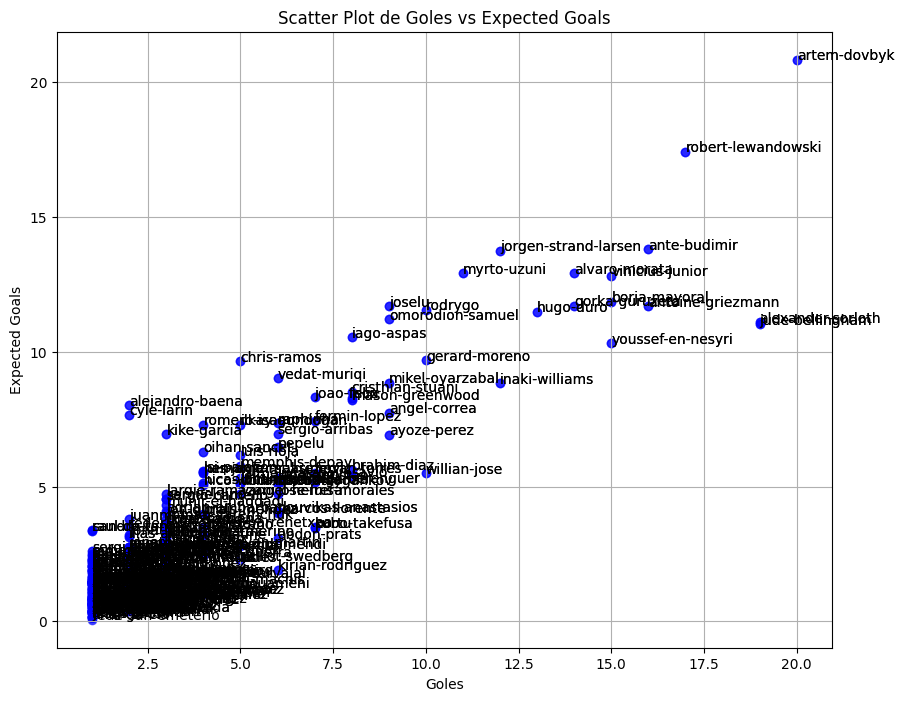

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde un CSV
df = pd.read_csv('../data/all_players_statistics.csv')


# Asegurarse de que las columnas 'Goals' y 'Assists' son numéricas
df['Goals'] = pd.to_numeric(df['Goals'], errors='coerce')
df['Expected Goals'] = pd.to_numeric(df['Expected Goals'], errors='coerce')

# Ordenar por goles y tomar los primeros 20 jugadores
top_scorers = df.sort_values(by='Goals', ascending=False).head(500)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(top_scorers['Goals'], top_scorers['Expected Goals'], alpha=0.6, color='blue')

# Añadir títulos y etiquetas
plt.title('Scatter Plot de Goles vs Expected Goals')
plt.xlabel('Goles')
plt.ylabel('Expected Goals')

# Añadir etiquetas de nombres de jugadores
for i, point in top_scorers.iterrows():
    plt.text(point['Goals'], point['Expected Goals'], point['Player Name'])

plt.grid(True)
plt.show()



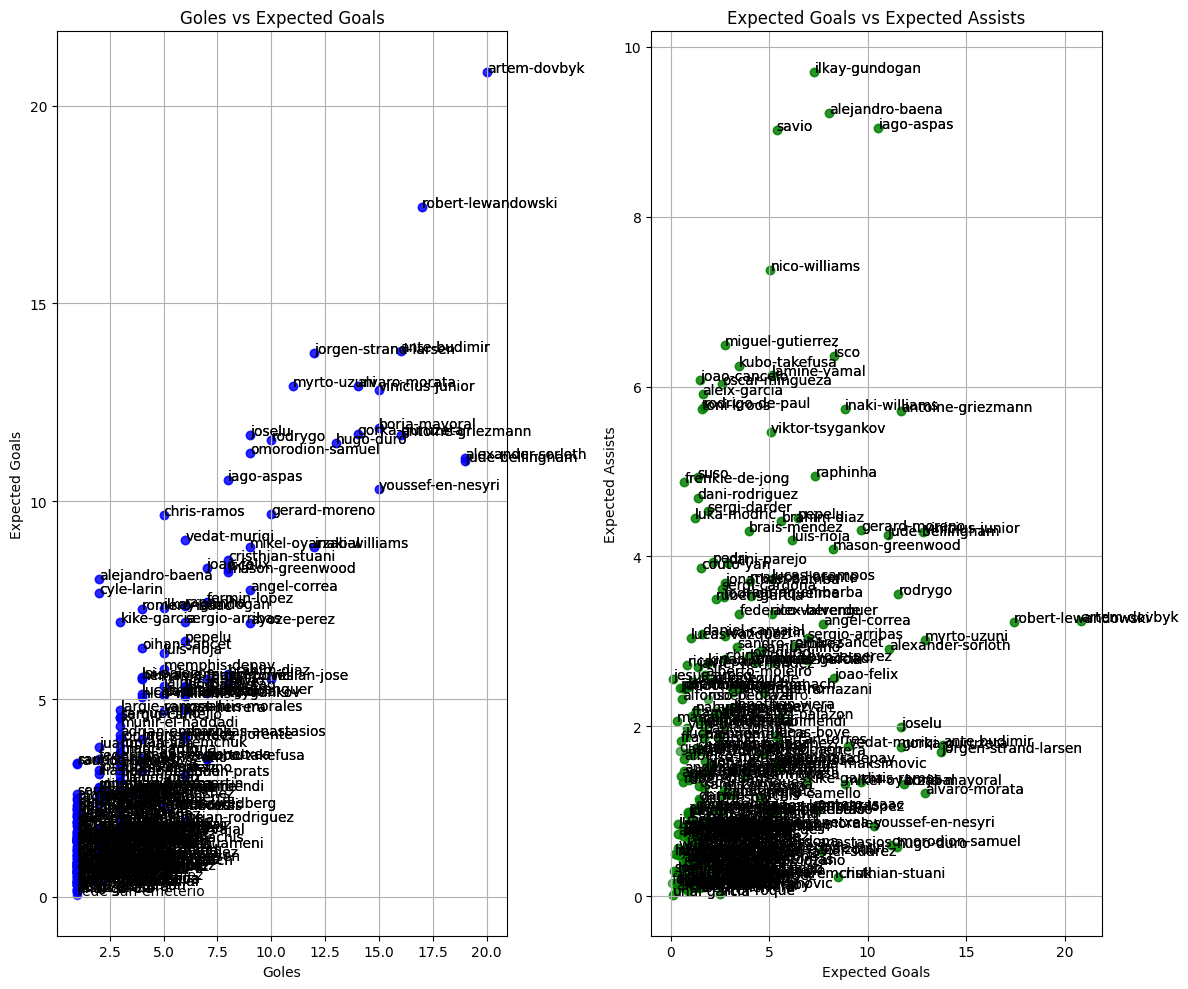

In [29]:
plt.figure(figsize=(12, 10))  # Ajustar tamaño de figura para acomodar ambos plots

# Primer subplot para Goles vs Expected Goals
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.scatter(top_scorers['Goals'], top_scorers['Expected Goals'], alpha=0.6, color='blue')
plt.title('Goles vs Expected Goals')
plt.xlabel('Goles')
plt.ylabel('Expected Goals')
plt.grid(True)

# Añadir etiquetas de nombres de jugadores para el primer gráfico
for i, point in top_scorers.iterrows():
    plt.text(point['Goals'], point['Expected Goals'], point['Player Name'])

# Segundo subplot para Expected Goals vs Expected Assists
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.scatter(top_scorers['Expected Goals'], top_scorers['Expected Assists'], alpha=0.6, color='green')
plt.title('Expected Goals vs Expected Assists')
plt.xlabel('Expected Goals')
plt.ylabel('Expected Assists')
plt.grid(True)

# Añadir etiquetas de nombres de jugadores para el segundo gráfico
for i, point in top_scorers.iterrows():
    plt.text(point['Expected Goals'], point['Expected Assists'], point['Player Name'])

plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para dar espacio entre ellos
plt.show()
